In [14]:
import zipfile
from konlpy.tag import Okt
from gensim.models import Word2Vec
from numpy import dot
from numpy.linalg import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 압축 해제
with zipfile.ZipFile('/aiffel/aiffel/synopsis.zip', 'r') as existing_zip:
    existing_zip.extractall('synopsis')

# 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하는 함수 정의
def extract_nouns(file_list):
    okt = Okt()
    result = []
    for file in file_list:
        with open(file, 'r') as f:
            text = f.read()
            result.append(okt.nouns(text))
    return result

# 파일 리스트와 장르 이름 설정

In [15]:
# 파일 리스트와 장르 이름 설정
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']


# Step 1. 명사 추출

In [17]:
# Step 1. 명사 추출
nouns_by_genre = extract_nouns(genre_txt)

# Step 2. 추출된 결과로 embedding model 만들기

In [18]:
# Step 2. 추출된 결과로 embedding model 만들기
model = Word2Vec(sentences=nouns_by_genre, vector_size=100, window=5, min_count=5, workers=4, sg=1)

# Checking most similar words
print("Most similar words to 드라마: ", model.wv.most_similar('드라마'))
print("Most similar words to 액션: ", model.wv.most_similar('액션'))

# cosine 유사도 계산 함수
def cosine_similarity(A, B):
    return dot(A, B)/(norm(A)*norm(B))

# WEAT 점수 계산 함수
def weat_score(X, Y, A, B):
    mean_X = np.mean([np.mean([cosine_similarity(x, a) - cosine_similarity(x, b) for a, b in zip(A, B)]) for x in X])
    mean_Y = np.mean([np.mean([cosine_similarity(y, a) - cosine_similarity(y, b) for a, b in zip(A, B)]) for y in Y])
    std_dev = np.std([np.mean([cosine_similarity(w, a) - cosine_similarity(w, b) for a, b in zip(A, B)]) for w in X + Y])
    return (mean_X - mean_Y) / std_dev

Most similar words to 드라마:  [('장르', 0.9959226846694946), ('상상력', 0.9944750666618347), ('스투트가르트', 0.9936086535453796), ('실험영화', 0.9934176802635193), ('스페인', 0.992974042892456), ('파노라마', 0.9928094148635864), ('미장센', 0.9925904870033264), ('회', 0.9920780658721924), ('포럼', 0.9920005202293396), ('히로시마', 0.9919943809509277)]
Most similar words to 액션:  [('문화', 0.9925357699394226), ('현대', 0.9905908703804016), ('세기', 0.9896430969238281), ('부분', 0.9894207715988159), ('형식', 0.9865874648094177), ('묘사', 0.9864405393600464), ('무대', 0.9863877892494202), ('배경', 0.9850779175758362), ('주제', 0.9848538637161255), ('세대', 0.9847211837768555)]


# Step 3. target, attribute 단어 셋 만들기

In [19]:
# Step 3. target, attribute 단어 셋 만들기
targets = genre_name
attributes = ['드라마', '액션']
attributes_A = [model.wv[word] for word in ['드라마', '감동', '눈물']]
attributes_B = [model.wv[word] for word in ['액션', '스릴', '전투']]

# Checking the target and attribute sets
print("Target set: ", targets)
print("Attribute A set: ", attributes_A)
print("Attribute B set: ", attributes_B)

Target set:  ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']
Attribute A set:  [array([-0.07951114,  0.19695595,  0.2525122 , -0.04853188,  0.08916663,
       -0.07314221,  0.19956583,  0.44632047, -0.15128389, -0.28583232,
       -0.086266  , -0.41134486,  0.00194711, -0.06109866, -0.13918054,
       -0.1914133 ,  0.10535806, -0.18671668, -0.08416342, -0.48097268,
       -0.03245694, -0.07432574,  0.0903718 ,  0.03117947, -0.03066601,
        0.15064302, -0.14429638, -0.201991  , -0.35331026, -0.05904115,
        0.2272733 ,  0.28725824,  0.15078184, -0.07005594,  0.04979661,
        0.18895203,  0.08459362, -0.37016848, -0.40947843, -0.3077823 ,
        0.04096602, -0.13398531,  0.17910962, -0.17794223,  0.15501778,
       -0.0869543 , -0.18926229, -0.02577891,  0.3045866 ,  0.23386823,
       -0.06752007, -0.26831785, -0.1856198 , -0.21031307, -0.1969484 ,
       -0.102620

# Step 4. TF-IDF 대신 장르별 상위 100개의 명사를 사용하여 단어셋을 만들기

In [20]:
# Step 4. TF-IDF 대신 단어셋을 만들기
# 이 경우, 각 장르별 상위 100개의 명사를 단어셋으로 사용
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = [model.wv[word] for word in nouns_by_genre[i] if word in model.wv]
        Y = [model.wv[word] for word in nouns_by_genre[j] if word in model.wv]
        matrix[j][i] = weat_score(X, Y, attributes_A, attributes_B)

# Step 5. Heatmap으로 시각화

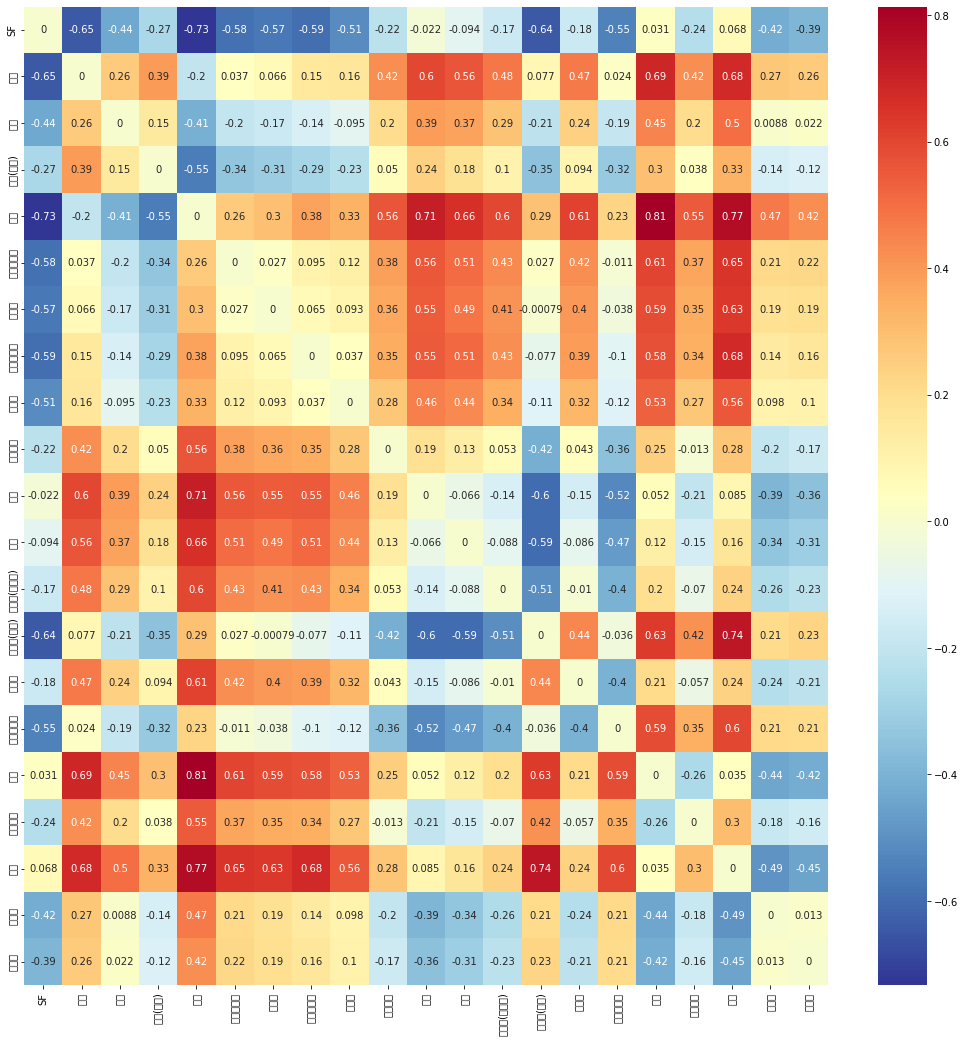

In [21]:
# Step 5. Heatmap으로 시각화
np_matrix = np.array(matrix)
np_matrix = (np_matrix + np_matrix.T)
plt.figure(figsize=(18,18))
sns.heatmap(np_matrix, xticklabels=targets, yticklabels=targets, annot=True, cmap='RdYlBu_r')
plt.show()